In [2]:
# Librerías usadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

### El dataset contiene las siguientes columnas:

- **user_id**: Identificador del usuario.

- **item_id**: Identificador del juego.

- **sentiment**: Sentimiento del usuario hacia el juego (1, 2 o algún otro valor).

- **items_count**: Número de juegos que posee el usuario.

- **playtime_forever**: Tiempo total jugado.

- **genres**: Géneros del juego.

- **app_name**: Nombre del juego.

- **price**: Precio del juego.

- **developer**: Desarrollador del juego.

- **release_year**: Año de lanzamiento del juego.

### Estadísticas Descriptivas

In [6]:
# Cargar el dataset
file_path = '..//src/data/dataset_full.csv'
df = pd.read_csv(file_path)

# Estadísticas descriptivas
descriptive_stats = df.describe()
descriptive_stats.T


,count,mean,std,min,25%,50%,75%,max
item_id,13893.0,170974.420428,132655.892171,10.0,8870.00,218230.00,265930.00,521570.00
sentiment,13893.0,1.316634,0.694168,0.0,1.00,1.00,2.00,2.00
items_count,13893.0,117.909811,187.223981,1.0,44.00,78.00,136.00,7762.00
playtime_forever,13893.0,12676.537753,27147.027288,0.0,525.00,2160.00,11471.00,642773.00
price,13893.0,15.236999,13.253638,0.0,6.99,14.99,19.99,189.96
release_year,13893.0,2012.416757,3.072300,1989.0,2012.00,2013.00,2014.00,2017.00



- **item_id**: Varía significativamente, lo cual es esperado ya que son identificadores únicos.

- **sentiment**: La media es ligeramente superior a 1, lo que podría indicar una inclinación de sentimientos neutrales a positivos.

- **items_count**: Hay usuarios con una cantidad muy variada de juegos, con un promedio de alrededor de 118 juegos y un máximo de 7762 juegos.

- **playtime_forever**: El tiempo de juego varía ampliamente, con un promedio de alrededor de 12,676 minutos. Hay valores extremadamente altos, como se ve en el valor máximo de 642,773 minutos.

- **price**: El precio de los juegos varía, con un promedio de unos 15.24 USD y un máximo de 189.96 USD.

- **release_year**: Los años de lanzamiento se centran principalmente en torno a los años recientes, con una media de 2012.

### Análisis de Outliers

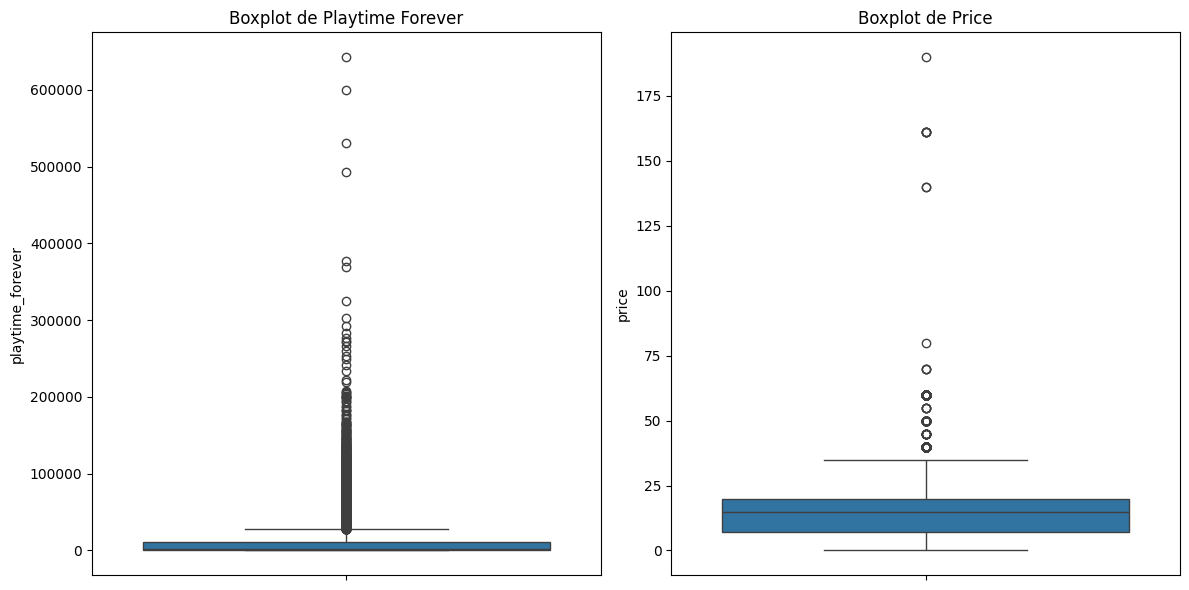

In [7]:
# Análisis de outliers para 'playtime_forever' y 'price'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['playtime_forever'])
plt.title('Boxplot de Playtime Forever')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['price'])
plt.title('Boxplot de Price')

plt.tight_layout()
plt.show()

-  **playtime_forever**: El boxplot muestra una gran cantidad de outliers, lo que indica que algunos usuarios han pasado una cantidad  muy alta de tiempo en ciertos juegos.

- **price**: También presenta algunos outliers, aunque en menor medida que el playtime_forever.

### Análisis de las variables categóricas

In [13]:
# Análisis de las variables categóricas
genres_count = Counter(df['genres'])
developers_count = Counter(df['developer'])
release_year_count = Counter(df['release_year'])

# Mostrar los resultados del análisis categórico
genres_count.most_common(5), developers_count.most_common(5), release_year_count.most_common(5)

([('Action', 10375),
  ('Indie', 1305),
  ('Adventure', 751),
  ('Casual', 409),
  ('Strategy', 393)],
 [('Valve', 2506),
  ('Facepunch Studios', 928),
  ('Bohemia Interactive', 436),
  ('Smartly Dressed Games', 358),
  ('Re-Logic', 270)],
 [(2012.0, 3300),
  (2013.0, 2170),
  (2015.0, 1804),
  (2014.0, 1751),
  (2011.0, 928)])

- **Géneros (genres):** El género más común es 'Acción', seguido por 'Indie' y 'Aventura'. Esto indica la preferencia de la muestra que estamos usando para el análisis y que posiblemente incidirá en la recomendación.

- **Desarrolladores (developer):** 'Valve' aparece como el desarrollador más común, seguido por 'Facepunch Studios' y 'Bohemia Interactive'. Esto refleja la popularidad de sus juegos en la plataforma STEAM.

- **Año de Lanzamiento (release_year):** Hay una concentración significativa de juegos lanzados en los años 2012 y 2013. Esto indica una tendencia en la producción o popularidad de juegos durante esos dos años.

### Nube de palabras para los títulos de los juegos

La nube de palabras muestra las palabras más frecuentes en los nombres de los juegos. El tamaño de la palabra Palabras indica mayor frecuencia. Este tipo de visualización es útil para obtener una rápida impresión de los temas o palabras clave más comunes en los títulos de los juegos.

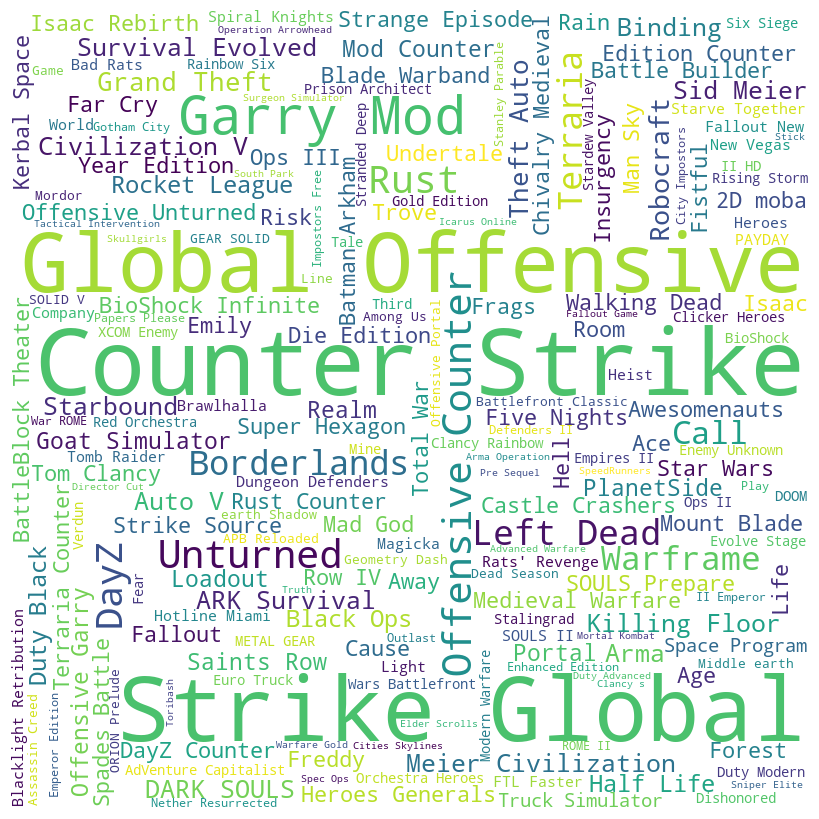

In [14]:
# Creando una nube de palabras para 'app_name'
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(" ".join(df['app_name']))

# Mostrar la nube de palabras
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Por el tamaño de las palabras podemos inferir que los juegos más comunes en el título de los juegos son:

- GLobal Offensive
- Counter Strike
- Strike Global
- Garry Mod
- Rust

Entre otros que se aprecian en la nube

### Matriz de Correlación

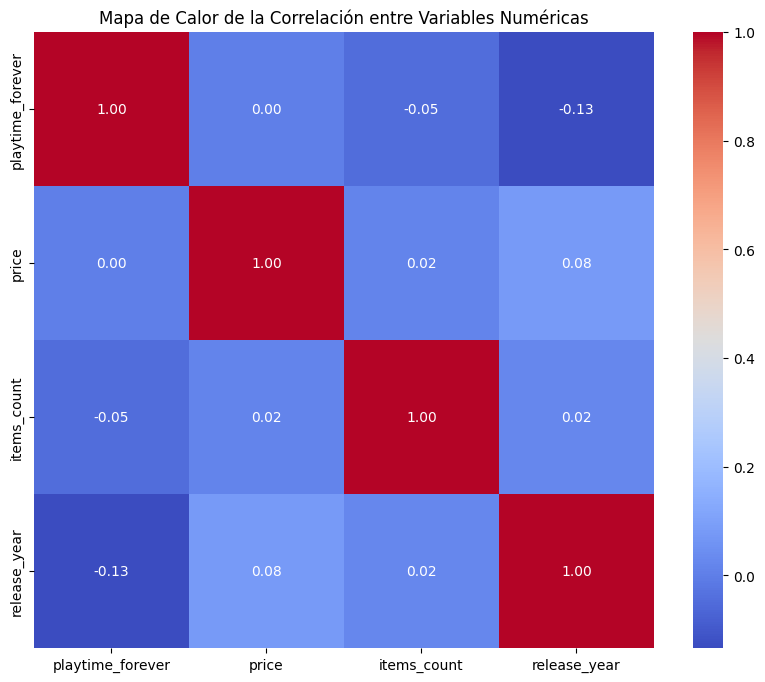

In [15]:
# Calculando la matriz de correlación
correlation_matrix = df[['playtime_forever', 'price', 'items_count', 'release_year']].corr()

# Creando el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor de la Correlación entre Variables Numéricas")
plt.show()

*Análisis*

- playtime_forever y items_count: Existe una correlación negativa muy débil entre el tiempo total jugado y la cantidad de juegos que posee un usuario. Esto sugiere que, en general, hay una ligera tendencia a que los usuarios con más juegos (items_count) tengan un menor tiempo total jugado por juego (playtime_forever), pero la relación es muy tenue.

- playtime_forever y price: La correlación entre el tiempo de juego y el precio del juego es muy baja. Esto indica que el precio de un juego no está fuertemente relacionado con la cantidad de tiempo que los usuarios pasan jugándolo.

- price y items_count: La correlación entre el precio y la cantidad de juegos que posee un usuario también es baja, lo que sugiere que no hay una relación fuerte entre cuánto gasta un usuario en juegos y cuántos juegos posee.

- release_year: Las correlaciones con el año de lanzamiento son generalmente bajas, lo que indica que el año de lanzamiento del juego no tiene una relación fuerte con el tiempo de juego, el precio o la cantidad de juegos que un usuario posee.

### Análisis de géneros

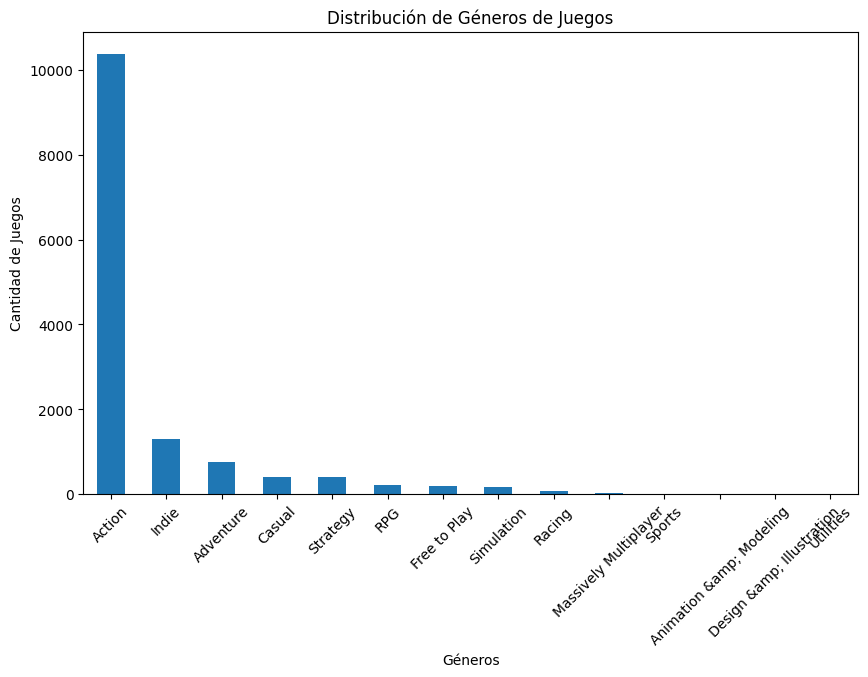

genres
Action                   10375
Indie                     1305
Adventure                  751
Casual                     409
Strategy                   393
RPG                        211
Free to Play               180
Simulation                 161
Racing                      68
Massively Multiplayer       20
Name: count, dtype: int64

In [17]:
# Análisis detallado de géneros
genre_counts = df['genres'].value_counts()

# Visualización de la distribución de géneros
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Distribución de Géneros de Juegos')
plt.xlabel('Géneros')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)
plt.show()

genre_counts.head(10)  # Mostrar los 10 géneros más comunes



*Observaciones*

- Predominio del Género 'Acción': Este género domina claramente en términos de cantidad de juegos, lo que sugiere una alta popularidad entre los usuarios.

- Otros Géneros Populares: 'Indie', 'Aventura' y 'Casual' siguen en términos de popularidad, aunque a una distancia considerable del género 'Acción'.

- Géneros Menos Comunes: Géneros como 'Racing' y 'Massively Multiplayer' aparecen menos frecuentemente en el dataset.

### Análisis de los desarrolladores

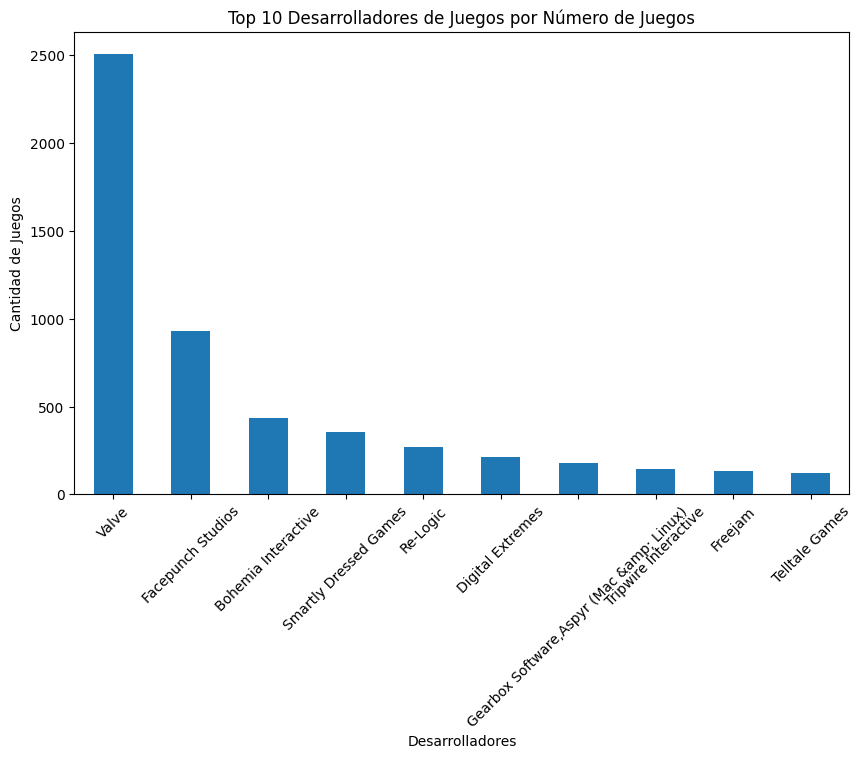

developer
Valve                                       2506
Facepunch Studios                            928
Bohemia Interactive                          436
Smartly Dressed Games                        358
Re-Logic                                     270
Digital Extremes                             214
Gearbox Software,Aspyr (Mac &amp; Linux)     177
Tripwire Interactive                         145
Freejam                                      135
Telltale Games                               123
Name: count, dtype: int64

In [19]:
# Análisis detallado de desarrolladores
developer_counts = df['developer'].value_counts()

# Visualización de la distribución de desarrolladores
plt.figure(figsize=(10, 6))
developer_counts.head(10).plot(kind='bar')  # Mostrando solo los 10 desarrolladores más comunes
plt.title('Top 10 Desarrolladores de Juegos por Número de Juegos')
plt.xlabel('Desarrolladores')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)
plt.show()

developer_counts.head(10)  # Mostrar los 10 desarrolladores más comunes

*Observaciones*

- Dominio de 'Valve': 'Valve' es, con mucha diferencia, el desarrollador más común en el dataset, lo que sugiere una gran popularidad de sus juegos entre los usuarios.

- Presencia de otros desarrolladores populares: 'Facepunch Studios', 'Bohemia Interactive', y 'Smartly Dressed Games' también tienen una presencia significativa, aunque mucho menor en comparación con 'Valve'.

- Diversidad entre los principales desarrolladores: Hay una variedad de desarrolladores en el top 10, lo que indica una diversidad en los juegos preferidos por los usuarios.

### Análisis de Tendencias a lo Largo del Tiempo (Año de Lanzamiento)

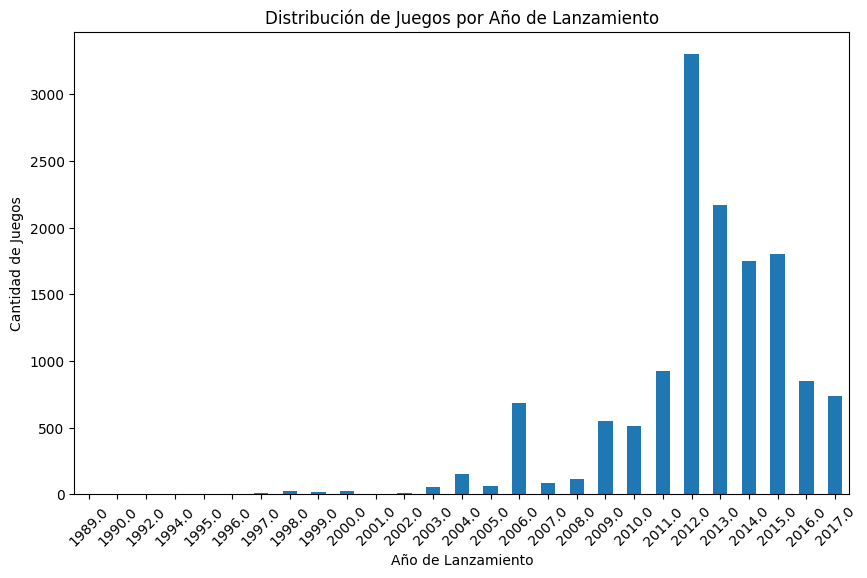

release_year
1989.0       1
1990.0       1
1992.0       2
1994.0       2
1995.0       4
1996.0       2
1997.0      13
1998.0      28
1999.0      21
2000.0      25
2001.0       6
2002.0      12
2003.0      57
2004.0     157
2005.0      60
2006.0     688
2007.0      87
2008.0     118
2009.0     554
2010.0     510
2011.0     928
2012.0    3300
2013.0    2170
2014.0    1751
2015.0    1804
2016.0     853
2017.0     739
Name: count, dtype: int64

In [21]:
# Análisis de tendencias a lo largo del tiempo (año de lanzamiento)
release_year_counts = df['release_year'].value_counts().sort_index()

# Visualización de la distribución de años de lanzamiento
plt.figure(figsize=(10, 6))
release_year_counts.plot(kind='bar')
plt.title('Distribución de Juegos por Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)
plt.show()

release_year_counts  # Mostrar la distribución de años de lanzamiento

*Observaciones*

- Pico en 2012 y 2013: hay un notable pico en la cantidad de juegos lanzados en los años 2012 y 2013. Esto podría deberse a un aumento en la producción de juegos o a una mayor adopción de la plataforma STEAM por parte de los desarrolladores y usuarios.

- Crecimiento sostenido desde mediados de los 2000: a partir de mediados de la década del 2000, se observa un crecimiento sostenido en el número de juegos lanzados cada año, alcanzando su punto máximo en 2012-2013.

- Variedad en los años anteriores: los años anteriores a 2000 muestran una menor cantidad de juegos, lo cual es esperable dada la evolución de la industria de los videojuegos y la tecnología.